# Working with HYPSO-1 Data

## Install hypso-package:
- Install using `pip3 install hypso`.
- PyPI page: https://pypi.org/project/hypso/
- GitHub page: https://github.com/NTNU-SmallSat-Lab/hypso-package


## Download HYPSO-1 captures:
- HYPSO-1 captures can be downloaded from: http://129.241.2.147:8008/

### Example: 
- http://129.241.2.147:8008/virginiabeach/virginiabeach_2024-08-29T15-10-18Z/
- http://129.241.2.147:8008/virginiabeach/virginiabeach_2024-08-29T15-10-18Z/virginiabeach_2024-08-29T15-10-18Z-l1a.nc
- http://129.241.2.147:8008/virginiabeach/virginiabeach_2024-08-29T15-10-18Z/processing-temp/sift-bin.points


## Load HYPSO-1 captures

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from hypso import Hypso1

Set NetCDF file:

In [3]:
l1a_nc_file = '/home/cameron/Nedlastinger/virginiabeach_2024-08-29T15-10-18Z-l1a.nc'

Set georeferencing ground control points file (if available):

In [4]:
points_file = '/home/cameron/Nedlastinger/sift-bin.points'

Load HYPSO-1 data:

In [5]:
satobj = Hypso1(path=l1a_nc_file, verbose=True)

[INFO] Loading L1a capture virginiabeach_2024-08-29T15-10-18Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] No georeferencing .points file provided. Skipping georeferencing.


Load ground control points and generate lat/lons:

In [6]:
satobj.load_points_file(path=points_file)

[INFO] Running georeferencing...
No image mode provided. Detected image mode: bin3
[INFO] Using UTM map: WGS 84 / UTM zone 18N EPSG: 32618


Apply calibration coefficients:

In [7]:
satobj.generate_l1b_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...


Get calibrated datacube:

In [8]:
calibrated_cube = satobj.get_l1b_cube()

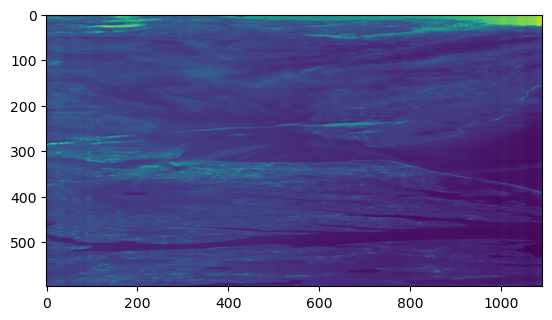

In [9]:
plt.imshow(calibrated_cube[:,:,40])

Get lat/lon values:

In [10]:
latitudes = satobj.latitudes
longitudes = satobj.longitudes